# The purpose of this notebook is to grade the responses of users who were ranomized and asked to interpret univariate and bivariate choropleths.
## The  data for the visualizations was drawn from a September 2021 CDC communication on Covid 19 vaccination rates and case rates by county which was originally presented as a bivariate choropleth.  It was hypothesized that this bivariate choropleth was difficult more difficult to correctly interpret than a pair of univariate choropleths would have been.
## This notebook establishes grading criteria for user answers:
* "Correct" answers are states in which over 50% of the visualized area is color encoded to indicate values above or below the median for each measure 

(e.g. a correct "high vaccination, low case rate" state is one in which over 50% of the visible area is encoded as being over the national median vaccination rate and under than national median case rate)

![](bivariate_highVaxLowCase.png)


![](univariate_highVaxLowCase.png)


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import datetime as dt
import geopandas as gpd

gdf = gpd.read_file(os.getcwd()+"/cb_2018_us_county_500k",dtype={'STATEFP':str})

from geopandas import GeoDataFrame
import numpy as np

In [7]:
fips = pd.read_csv(os.getcwd()+'/fipsCodes.csv',dtype={'FIPS':str})
fips.FIPS = fips.FIPS.str.zfill(5)

In [8]:
gdf2 = gpd.read_file(os.getcwd()+"/cb_2018_us_state_500k(1)")
gdf2 = gdf2[~gdf2.NAME.isin(['Texas','Puerto Rico','Guam','Hawaii','Commonwealth of the Northern Mariana Islands',\
                          'United States Virgin Islands','Alaska','American Samoa'])]

In [9]:
gdf2 = GeoDataFrame(gdf2)

In [10]:
states = pd.read_csv(os.getcwd()+'/stateAbbrev.csv')

In [11]:
fips

,FIPS,Name,State
0,01001,Autauga,AL
1,01003,Baldwin,AL
2,01005,Barbour,AL
3,01007,Bibb,AL
4,01009,Blount,AL
...,...,...,...
3227,72151,Yabucoa,PR
3228,72153,Yauco,PR
3229,78010,St. Croix,VI
3230,78020,St. John,VI


In [12]:
state_abbrev = pd.read_csv(os.getcwd()+'/us-state-ansi-fips.csv',dtype={'state_code':str,'abbrev':str})
state_abbrev.state_code = state_abbrev.state_code.str.zfill(2)
state_abbrev.head()

,state_name,state_code,abbrev
0,Alabama,01,AL
1,Alaska,02,AK
2,Arizona,04,AZ
3,Arkansas,05,AR
4,California,06,CA


In [13]:
gdf = gdf.merge(state_abbrev,left_on='STATEFP',right_on='state_code')

In [14]:
mappingData = pd.read_csv(os.getcwd()+'/mappingData.csv',dtype={'FIPS':str})

In [15]:
mappingData

,FIPS,County,State,Cases - last 7 days per 100k,% total pop fully vaccinated,Vaccination county reporting completeness,bivairate_colorCode,vaxRate_colorCode,caseRate_colorCode
0,1001,Autauga County,AL,513.70,31.6,92.2,#D47A91,#E6E6E6,#D47A91
1,1003,Baldwin County,AL,404.96,39.8,92.2,#797691,#8FD3C2,#D47A91
2,1005,Barbour County,AL,469.90,33.0,92.2,#AA778E,#BDDFD6,#D47A91
3,1007,Bibb County,AL,714.48,27.8,92.2,#CD334C,#E6E6E6,#CD334C
4,1009,Blount County,AL,572.41,23.7,92.2,#CD334C,#E6E6E6,#CD334C
...,...,...,...,...,...,...,...,...,...
2938,72151,NaN,NaN,359.00,40.0,NaN,#797691,#8FD3C2,#D47A91
2939,72153,NaN,NaN,359.00,40.0,NaN,#797691,#8FD3C2,#D47A91
2940,78010,NaN,NaN,359.00,40.0,NaN,#797691,#8FD3C2,#D47A91
2941,78020,NaN,NaN,359.00,40.0,NaN,#797691,#8FD3C2,#D47A91


In [16]:
mappingData.FIPS = mappingData.FIPS.str.zfill(5)

<AxesSubplot:>

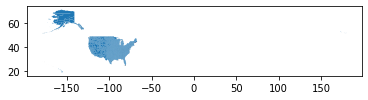

In [17]:
gdf.plot()

In [18]:
gdf['FIPS'] = gdf.STATEFP + gdf.COUNTYFP

In [19]:
mappingData = pd.merge(fips,mappingData.rename(columns={'Cases - last 7 days per 100k_y':'% total pop fully vaccinated','Cases - last 7 days per 100k_x':'Cases - last 7 days per 100k'})[['FIPS', 
       'Cases - last 7 days per 100k', '% total pop fully vaccinated',
        'bivairate_colorCode',
       'vaxRate_colorCode', 'caseRate_colorCode']],on='FIPS',how='inner')

In [20]:
gdf = pd.merge(gdf,mappingData,on='FIPS',how='inner')

In [21]:
[case25,case50,case75] = gdf['Cases - last 7 days per 100k'].quantile([0.25,.50,.75])

In [22]:
[vax25,vax50,vax75] = gdf['% total pop fully vaccinated'].quantile([0.25,.50,.75])

In [23]:
gdf.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,state_code,abbrev,FIPS,Name,State,Cases - last 7 days per 100k,% total pop fully vaccinated,bivairate_colorCode,vaxRate_colorCode,caseRate_colorCode
0,21,007,00516850,0500000US21007,21007,Ballard,06,639387454,69473325,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",...,21,KY,21007,Ballard,KY,329.61,29.0,#DCB2BD,#E6E6E6,#DCB2BD
1,21,017,00516855,0500000US21017,21017,Bourbon,06,750439351,4829777,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",...,21,KY,21017,Bourbon,KY,864.16,48.0,#2C1843,#65C7A6,#CD334C
2,21,031,00516862,0500000US21031,21031,Butler,06,1103571974,13943044,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",...,21,KY,21031,Butler,KY,993.87,38.3,#A52948,#BDDFD6,#CD334C
3,21,065,00516879,0500000US21065,21065,Estill,06,655509930,6516335,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",...,21,KY,21065,Estill,KY,581.31,41.1,#6E1E45,#8FD3C2,#CD334C
4,21,069,00516881,0500000US21069,21069,Fleming,06,902727151,7182793,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",...,21,KY,21069,Fleming,KY,315.48,40.3,#85B0BC,#8FD3C2,#DCB2BD


<AxesSubplot:>

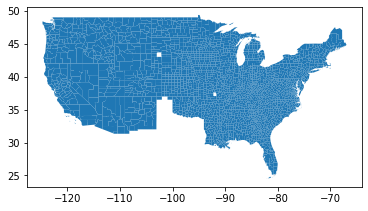

In [24]:
gdf.plot()

# Results

In [25]:
results = pd.read_csv('/Users/alex/Documents/bivariate_study/results.csv')

In [26]:
results.head()

,ip_hash,user_agent,group,platform,age,gender,education,map_comfort,colorblind,robot_duration,...,map2_q1_state,map2_q1_date,map2_q2_duration,map2_q2_state,map2_q2_date,map2_difficulty,map2_difficulty_explain,map_pref,map_pref_explain,prime_panel_participant
0,047c635afcb0cffa159c285255e4b9b66c255c27658f2a...,Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:1...,e,desktop,58,male,high_school,3,no,2604,...,Oregon,Tue Aug 30 2022 15:45:28 GMT-0400 (Eastern Day...,17443,Wyoming,Tue Aug 30 2022 15:45:53 GMT-0400 (Eastern Day...,4,hard to figure out,bivariate,easier to follow,630e683b-85d5-0f17-a2f1-2f9a8c73f09a
1,060b059ee600dff24f51afda24b368cd97a3d246d48c0d...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,e,desktop,66,female,some_college,4,no,2038,...,Wyoming,Tue Aug 30 2022 12:53:17 GMT-0700 (Pacific Day...,7567,Nebraska,Tue Aug 30 2022 12:53:30 GMT-0700 (Pacific Day...,3,Little difficult because some was solid and so...,univariate,one was too jumbled,630e698c-ecaf-e3cd-6ceb-4bfb9e796968
2,06c989ecceccdb1e602152cbb43f560e10ab1e5e5bcb0b...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,d,desktop,22,male,college,5,no,1838,...,Nevada,Tue Aug 30 2022 12:20:16 GMT-0500 (Central Day...,4689,Washington,Tue Aug 30 2022 12:20:24 GMT-0500 (Central Day...,2,"The colors were differentiated enough, but sti...",bivariate,It helps you compare better,630e4606-ad41-547d-67ce-096f71cf4e66
3,06fdacbaa7bb11b35b3c8dcee7d68bb2d1e5ebdd1b3493...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,h,desktop,41,male,college,4,no,4082,...,Maine,Tue Aug 30 2022 16:12:59 GMT-0400 (Eastern Day...,8009,Tennessee,Tue Aug 30 2022 16:13:11 GMT-0400 (Eastern Day...,1,1,univariate,2 options are better than 1,630e6e13-7f43-fe7f-c6a0-5f04012dca92
4,0730b595af54db20d25b20fea27fae0885eeb935b74029...,Mozilla/5.0 (X11; CrOS aarch64 14909.100.0) Ap...,c,desktop,37,female,graduate,5,no,2255,...,New Mexico,Mon Aug 29 2022 16:56:51 GMT-0400 (Eastern Day...,183935,Colorado,Mon Aug 29 2022 16:59:57 GMT-0400 (Eastern Day...,1,It wasn't difficult because I could just click...,bivariate,It has many colors and it is nice,630d274e-61af-bf7d-dad9-f58e16ffff04


## Convert durations to seconds

In [27]:
for i in results.columns:
    if 'duration' in i:
        results[i] = results[i]/1000

In [28]:
results.robot_duration.median()

3.8594999999999997

# Decode Group/Questions to Map/Vax/Case

In [29]:
demog_cols = ['ip_hash','user_agent','group','platform','age','gender','education','map_comfort','colorblind','robot_duration','robot_state']

In [30]:
question_cols = ['ip_hash','group','map1_q2_duration','map1_q2_state','map1_difficulty','map1_difficulty_explain','map2_q2_duration','map2_q2_state','map2_difficulty',\
'map2_difficulty_explain','map_pref','map_pref_explain']

### Group A

In [31]:
group_a = results[(results.group=='a')][question_cols]

group_a['first_map'] = 'univariate'

for i in group_a.columns:
    if 'map1' in i:
        group_a.rename(columns={i: 'univariate_lowVax_lowCase' + i.split('map1')[1]},inplace=True)
    if 'map2' in i:
        group_a.rename(columns={i: 'bivariate_lowVax_highCase' + i.split('map2')[1]},inplace=True)

In [32]:
group_b = results[(results.group=='b')][question_cols]

group_b['first_map'] = 'univariate'

for i in group_b.columns:
    if 'map1' in i:
        group_b.rename(columns={i: 'univariate_lowVax_highCase' + i.split('map1')[1]},inplace=True)
    if 'map2' in i:
        group_b.rename(columns={i: 'bivariate_highVax_highCase' + i.split('map2')[1]},inplace=True)

In [33]:
group_c = results[(results.group=='c')][question_cols]

group_c['first_map'] = 'univariate'

for i in group_c.columns:
    if 'map1' in i:
        group_c.rename(columns={i: 'univariate_highVax_lowCase' + i.split('map1')[1]},inplace=True)
    if 'map2' in i:
        group_c.rename(columns={i: 'bivariate_lowVax_highCase' + i.split('map2')[1]},inplace=True)

In [34]:
group_d = results[(results.group=='d')][question_cols]

group_d['first_map'] = 'univariate'

for i in group_d.columns:
    if 'map1' in i:
        group_d.rename(columns={i: 'univariate_highVax_highCase' + i.split('map1')[1]},inplace=True)
    if 'map2' in i:
        group_d.rename(columns={i: 'bivariate_highVax_highCase' + i.split('map2')[1]},inplace=True)

In [35]:
group_e = results[(results.group=='e')][question_cols]

group_e['first_map'] = 'bivariate'

for i in group_e.columns:
    if 'map1' in i:
        group_e.rename(columns={i: 'bivariate_lowVax_lowCase' + i.split('map1')[1]},inplace=True)
    if 'map2' in i:
        group_e.rename(columns={i: 'univariate_highVax_lowCase' + i.split('map2')[1]},inplace=True)

In [36]:
group_f = results[(results.group=='f')][question_cols]

group_f['first_map'] = 'bivariate'

for i in group_f.columns:
    if 'map1' in i:
        group_f.rename(columns={i: 'bivariate_highVax_lowCase' + i.split('map1')[1]},inplace=True)
    if 'map2' in i:
        group_f.rename(columns={i: 'univariate_highVax_highCase' + i.split('map2')[1]},inplace=True)

In [37]:
group_g = results[(results.group=='g')][question_cols]

group_g['first_map'] = 'bivariate'

for i in group_g.columns:
    if 'map1' in i:
        group_g.rename(columns={i: 'bivariate_lowVax_highCase' + i.split('map1')[1]},inplace=True)
    if 'map2' in i:
        group_g.rename(columns={i: 'univariate_highVax_lowCase' + i.split('map2')[1]},inplace=True)

In [38]:
group_h = results[(results.group=='h')][question_cols]

group_h['first_map'] = 'bivariate'

for i in group_h.columns:
    if 'map1' in i:
        group_h.rename(columns={i: 'bivariate_highVax_highCase' + i.split('map1')[1]},inplace=True)
    if 'map2' in i:
        group_h.rename(columns={i: 'univariate_highVax_highCase' + i.split('map2')[1]},inplace=True)

In [39]:
decoded_res = pd.concat([group_a,group_b,group_c,group_d,group_e,group_f,group_g,group_h])

In [40]:
for c in decoded_res.columns:
    if '_q2' in c:
        decoded_res.rename(columns={c:c.replace('_q2','')},inplace=True)

# Make dataframes of each map/vax/case combo

 High Vax Low Case

In [41]:
bivariate_highVax_lowCase = decoded_res[~decoded_res.bivariate_highVax_lowCase_state.isnull()]
colsList = []
for c in bivariate_highVax_lowCase:
    if len(bivariate_highVax_lowCase[bivariate_highVax_lowCase[c].isnull()]) == len(bivariate_highVax_lowCase):
        continue
    else:
        colsList.append(c)
bivariate_highVax_lowCase = bivariate_highVax_lowCase[colsList]

In [42]:
univariate_highVax_lowCase = decoded_res[~decoded_res['univariate_highVax_lowCase'+'_state'].isnull()]
colsList = []
for c in univariate_highVax_lowCase:
    if len(univariate_highVax_lowCase[univariate_highVax_lowCase[c].isnull()]) == len(univariate_highVax_lowCase):
        continue
    else:
        colsList.append(c)
univariate_highVax_lowCase = univariate_highVax_lowCase[colsList]

Low Vax High Case

In [43]:
bivariate_lowVax_highCase = decoded_res[~decoded_res['bivariate_lowVax_highCase'+'_state'].isnull()]
colsList = []
for c in bivariate_lowVax_highCase:
    if len(bivariate_lowVax_highCase[bivariate_lowVax_highCase[c].isnull()]) == len(bivariate_lowVax_highCase):
        continue
    else:
        colsList.append(c)
bivariate_lowVax_highCase = bivariate_lowVax_highCase[colsList]

In [44]:
univariate_lowVax_highCase = decoded_res[~decoded_res['univariate_lowVax_highCase'+'_state'].isnull()]
colsList = []
for c in univariate_lowVax_highCase:
    if len(univariate_lowVax_highCase[univariate_lowVax_highCase[c].isnull()]) == len(univariate_lowVax_highCase):
        continue
    else:
        colsList.append(c)
univariate_lowVax_highCase = univariate_lowVax_highCase[colsList]

High Vax High Case

In [45]:
bivariate_highVax_highCase = decoded_res[~decoded_res['bivariate_highVax_highCase'+'_state'].isnull()]
colsList = []
for c in bivariate_highVax_highCase:
    if len(bivariate_highVax_highCase[bivariate_highVax_highCase[c].isnull()]) == len(bivariate_highVax_highCase):
        continue
    else:
        colsList.append(c)
bivariate_highVax_highCase = bivariate_highVax_highCase[colsList]

In [46]:
univariate_highVax_highCase = decoded_res[~decoded_res['univariate_highVax_highCase'+'_state'].isnull()]
colsList = []
for c in univariate_highVax_highCase:
    if len(univariate_highVax_highCase[univariate_highVax_highCase[c].isnull()]) == len(univariate_highVax_highCase):
        continue
    else:
        colsList.append(c)
univariate_highVax_highCase = univariate_highVax_highCase[colsList]

Low Vax Low Case

In [47]:
bivariate_lowVax_lowCase = decoded_res[~decoded_res['bivariate_lowVax_lowCase'+'_state'].isnull()]
colsList = []
for c in bivariate_lowVax_lowCase:
    if len(bivariate_lowVax_lowCase[bivariate_lowVax_lowCase[c].isnull()]) == len(bivariate_lowVax_lowCase):
        continue
    else:
        colsList.append(c)
bivariate_lowVax_lowCase = bivariate_lowVax_lowCase[colsList]

In [48]:
univariate_lowVax_lowCase = decoded_res[~decoded_res['univariate_lowVax_lowCase'+'_state'].isnull()]
colsList = []
for c in univariate_lowVax_lowCase:
    if len(univariate_lowVax_lowCase[univariate_lowVax_lowCase[c].isnull()]) == len(univariate_lowVax_lowCase):
        continue
    else:
        colsList.append(c)
univariate_lowVax_lowCase = univariate_lowVax_lowCase[colsList]

# Grading

In [49]:
def timeAndGradePlot(frame_oi,mapvaxcase):
    fig, ax = plt.subplots(1, figsize=(5, 5))

    frame_oi.groupby(mapvaxcase+'_GRADE')[mapvaxcase+'_duration'].hist(bins=20,alpha=0.5,legend=True,ax=ax)
    ax.legend(['incorrect','correct'])

    median_correct = frame_oi[frame_oi[mapvaxcase+'_GRADE']==1][mapvaxcase+'_duration'].median()
    median_incorrect = frame_oi[frame_oi[mapvaxcase+'_GRADE']==0][mapvaxcase+'_duration'].median()

    plt.vlines(median_correct,0,10,color='#bd4715',linestyle='--')
    plt.vlines(median_incorrect,0,9,color='blue',linestyle='--')

    plt.title(mapvaxcase + ' duration to answer\n',fontsize=15)
    plt.xlabel('\nseconds to answer',fontsize=15)
    plt.ylabel('participants in bucket\n',fontsize=15)

    pct_correct = round(len(frame_oi[frame_oi[mapvaxcase+'_GRADE']==1]) / len(frame_oi),3)

    plt.annotate('Total Participants: '+ str(len(frame_oi)), xy =(1.1, .9),fontsize=15,textcoords='axes fraction' )

    
    plt.annotate('Correct: '+ str(round(pct_correct*100,1))+'%', xy =(1.1, .8),fontsize=15,textcoords='axes fraction' )

    plt.annotate('Correct Median time: '+ str(round(median_correct,1))+' sec', xy =(1.1, .7),fontsize=15,textcoords='axes fraction' )

    plt.annotate('Wrong Median time: '+ str(round(median_incorrect,1))+' sec', xy =(1.1, .6),fontsize=15,textcoords='axes fraction' )
    fig.savefig(os.getcwd()+'/grading_plots/' + mapvaxcase +'.png',dpi=400, bbox_inches="tight")
    plt.show()


# High Vax / Low Case

In [50]:
def corrected_colorCoder(vax,cases):
    if vax > vax50 and cases < case50:
        return('red')
    else:
        return('white')
    
gdf['colorCode'] =  gdf.apply(lambda x: corrected_colorCoder(x['% total pop fully vaccinated'],x['Cases - last 7 days per 100k']), axis=1)
gdf['colorCode'] = gdf.colorCode.fillna('white')

In [51]:
hitArea = pd.DataFrame(gdf[gdf.colorCode=='red'].groupby('State').ALAND.sum()).reset_index()
hitArea.rename(columns={'ALAND':'hitArea'},inplace=True)
hitArea = pd.merge(hitArea,pd.DataFrame(gdf.groupby('State').ALAND.sum()).reset_index())
hitArea['percentHit'] = hitArea.hitArea / hitArea.ALAND
hitArea.sort_values('percentHit',ascending=False,inplace=True)
hitArea = pd.merge(hitArea,states,left_on='State',right_on='abbrev')
hitList = hitArea[hitArea.percentHit>.5].state.tolist()
hitArea[hitArea.percentHit>.5]

,State,hitArea,ALAND,percentHit,state,abbrev
0,ME,79887426037,79887426037,1.000000,Maine,ME
1,CT,12542497068,12542497068,1.000000,Connecticut,CT
2,NJ,19047825980,19047825980,1.000000,New Jersey,NJ
3,NH,23189413166,23189413166,1.000000,New Hampshire,NH
4,RI,2677779902,2677779902,1.000000,Rhode Island,RI
5,MA,18797286817,20205125364,0.930323,Massachusetts,MA
6,NY,107995863315,122049149763,0.884856,New York,NY
7,WI,111117403137,140290039723,0.792055,Wisconsin,WI
8,MD,19515376537,25151100280,0.775925,Maryland,MD
9,AZ,210285827233,294198551143,0.714775,Arizona,AZ


<AxesSubplot:title={'center':'12 Sep 21 High Vax Rate / Low Case Rate counties'}>

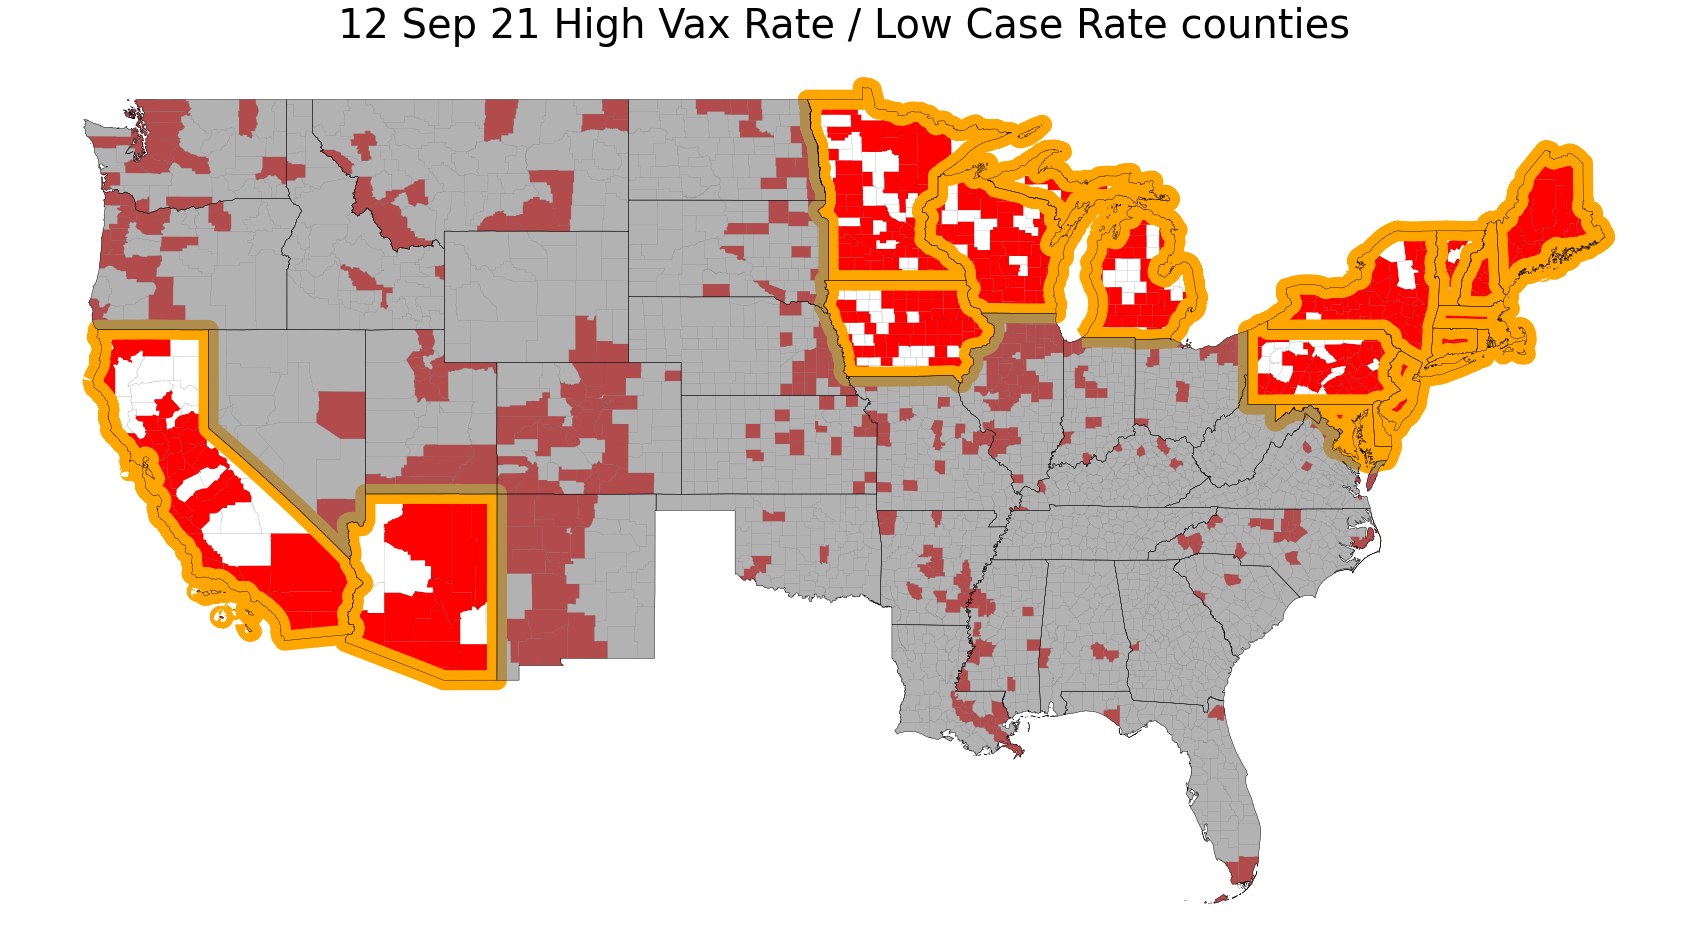

In [52]:


# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 25))

thresh = 100

# remove the axis
ax.axis('off')
gdf2.geometry.boundary.plot(color=None,edgecolor='black',linewidth = .4,ax=ax) #Use your second dataframe

gdf.plot( color=gdf.colorCode, linewidth=0.08, ax=ax, edgecolor='0.05')
plt.title('12 Sep 21 High Vax Rate / Low Case Rate counties',fontsize=40)
gdf2[gdf2.STUSPS.isin(hitArea[hitArea.percentHit>.5].State.tolist())].plot(ax=ax,color='none',edgecolor='orange',linewidth=20)
gdf2[~gdf2.STUSPS.isin(hitArea[hitArea.percentHit>.5].State.tolist())].plot(ax=ax,color='grey',alpha=.6)

## Univariate High Vaccination Low Case

In [53]:
mapvaxcase = 'univariate_highVax_lowCase'
frame_oi = univariate_highVax_lowCase

In [54]:
univariate_highVax_lowCase['univariate_highVax_lowCase_GRADE'] = np.where(univariate_highVax_lowCase.univariate_highVax_lowCase_state.isin(hitList), 1, 0)

In [55]:
univariate_highVax_lowCase['univariate_highVax_lowCase_GRADE'].sum()/len(univariate_highVax_lowCase)

0.514018691588785

In [56]:
univariate_highVax_lowCase.groupby('univariate_highVax_lowCase_GRADE').univariate_highVax_lowCase_duration.mean()

univariate_highVax_lowCase_GRADE
0    10.136846
1    14.355691
Name: univariate_highVax_lowCase_duration, dtype: float64

<ipython-input-49-b8023828a37a>:19: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Total Participants: '+ str(len(frame_oi)), xy =(1.1, .9),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:22: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct: '+ str(round(pct_correct*100,1))+'%', xy =(1.1, .8),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:24: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct Median time: '+ str(round(median_correct,1))+' sec', xy =(1.1, .7),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:26: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Wrong Me

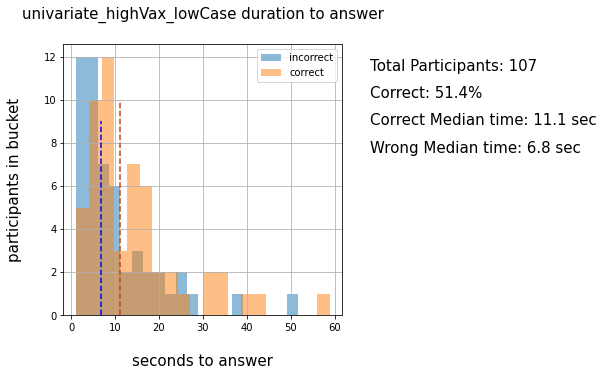

In [57]:
timeAndGradePlot(frame_oi,mapvaxcase)

In [58]:
univariate_highVax_lowCase[univariate_highVax_lowCase.univariate_highVax_lowCase_GRADE==0].univariate_highVax_lowCase_state.value_counts()

Wyoming          16
Nebraska         12
Georgia           6
Tennessee         6
New Mexico        3
Virginia          2
Florida           2
Kentucky          1
Colorado          1
Ohio              1
West Virginia     1
Utah              1
Name: univariate_highVax_lowCase_state, dtype: int64

In [59]:
univariate_highVax_lowCase.columns

Index(['ip_hash', 'group', 'bivariate_lowVax_highCase_duration',
       'bivariate_lowVax_highCase_state',
       'bivariate_lowVax_highCase_difficulty',
       'bivariate_lowVax_highCase_difficulty_explain', 'map_pref',
       'map_pref_explain', 'first_map', 'univariate_highVax_lowCase_duration',
       'univariate_highVax_lowCase_state',
       'univariate_highVax_lowCase_difficulty',
       'univariate_highVax_lowCase_difficulty_explain',
       'bivariate_lowVax_lowCase_duration', 'bivariate_lowVax_lowCase_state',
       'bivariate_lowVax_lowCase_difficulty',
       'bivariate_lowVax_lowCase_difficulty_explain',
       'univariate_highVax_lowCase_GRADE'],
      dtype='object')

## Bivariate High Vaccination Low Case

In [60]:
mapvaxcase = 'bivariate_highVax_lowCase'
frame_oi = bivariate_highVax_lowCase

In [61]:
bivariate_highVax_lowCase['bivariate_highVax_lowCase_GRADE'] = np.where(bivariate_highVax_lowCase.bivariate_highVax_lowCase_state.isin(hitList), 1, 0)

In [62]:
bivariate_highVax_lowCase['bivariate_highVax_lowCase_GRADE'].sum()/len(bivariate_highVax_lowCase)

0.30303030303030304

In [63]:
bivariate_highVax_lowCase.groupby('bivariate_highVax_lowCase_GRADE').bivariate_highVax_lowCase_duration.mean()

bivariate_highVax_lowCase_GRADE
0    18.364826
1    17.934200
Name: bivariate_highVax_lowCase_duration, dtype: float64

<ipython-input-49-b8023828a37a>:19: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Total Participants: '+ str(len(frame_oi)), xy =(1.1, .9),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:22: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct: '+ str(round(pct_correct*100,1))+'%', xy =(1.1, .8),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:24: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct Median time: '+ str(round(median_correct,1))+' sec', xy =(1.1, .7),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:26: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Wrong Me

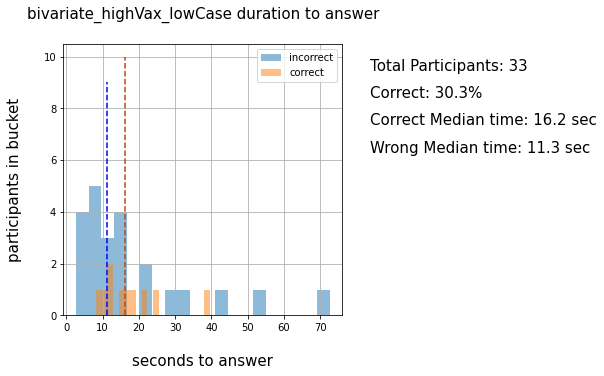

In [64]:
timeAndGradePlot(frame_oi,mapvaxcase)

In [65]:
bivariate_highVax_lowCase[bivariate_highVax_lowCase.bivariate_highVax_lowCase_GRADE==0].bivariate_highVax_lowCase_state.value_counts()

Nebraska      11
Utah           5
New Mexico     2
Wyoming        2
Virginia       1
Oregon         1
Florida        1
Name: bivariate_highVax_lowCase_state, dtype: int64

# Low Vaccination High Case

In [66]:
def corrected_colorCoder(vax,cases):
    if vax < vax50 and cases > case50:
        return('red')
    else:
        return('white')
    
gdf['colorCode'] =  gdf.apply(lambda x: corrected_colorCoder(x['% total pop fully vaccinated'],x['Cases - last 7 days per 100k']), axis=1)
gdf['colorCode'] = gdf.colorCode.fillna('white')

In [67]:
hitArea = pd.DataFrame(gdf[gdf.colorCode=='red'].groupby('State').ALAND.sum()).reset_index()
hitArea.rename(columns={'ALAND':'hitArea'},inplace=True)
hitArea = pd.merge(hitArea,pd.DataFrame(gdf.groupby('State').ALAND.sum()).reset_index())
hitArea['percentHit'] = hitArea.hitArea / hitArea.ALAND
hitArea.sort_values('percentHit',ascending=False,inplace=True)
hitArea = pd.merge(hitArea,states,left_on='State',right_on='abbrev')
hitList = hitArea[hitArea.percentHit>.5].state.tolist()
hitArea[hitArea.percentHit>.5]

,State,hitArea,ALAND,percentHit,state,abbrev
0,WV,61333843203,62266474513,0.985022,West Virginia,WV
1,GA,121871365695,149482048342,0.815291,Georgia,GA
2,TN,75425665583,106802728188,0.706215,Tennessee,TN
3,AL,90534069847,131174048583,0.690183,Alabama,AL
4,WY,169343953106,251458544898,0.673447,Wyoming,WY
5,LA,67919444742,111897594374,0.606979,Louisiana,LA
6,ID,117584530749,214049787659,0.549333,Idaho,ID
7,KY,51384653361,102279490672,0.502394,Kentucky,KY


<AxesSubplot:title={'center':'12 Sep 21 Low Vax Rate / High Case Rate counties'}>

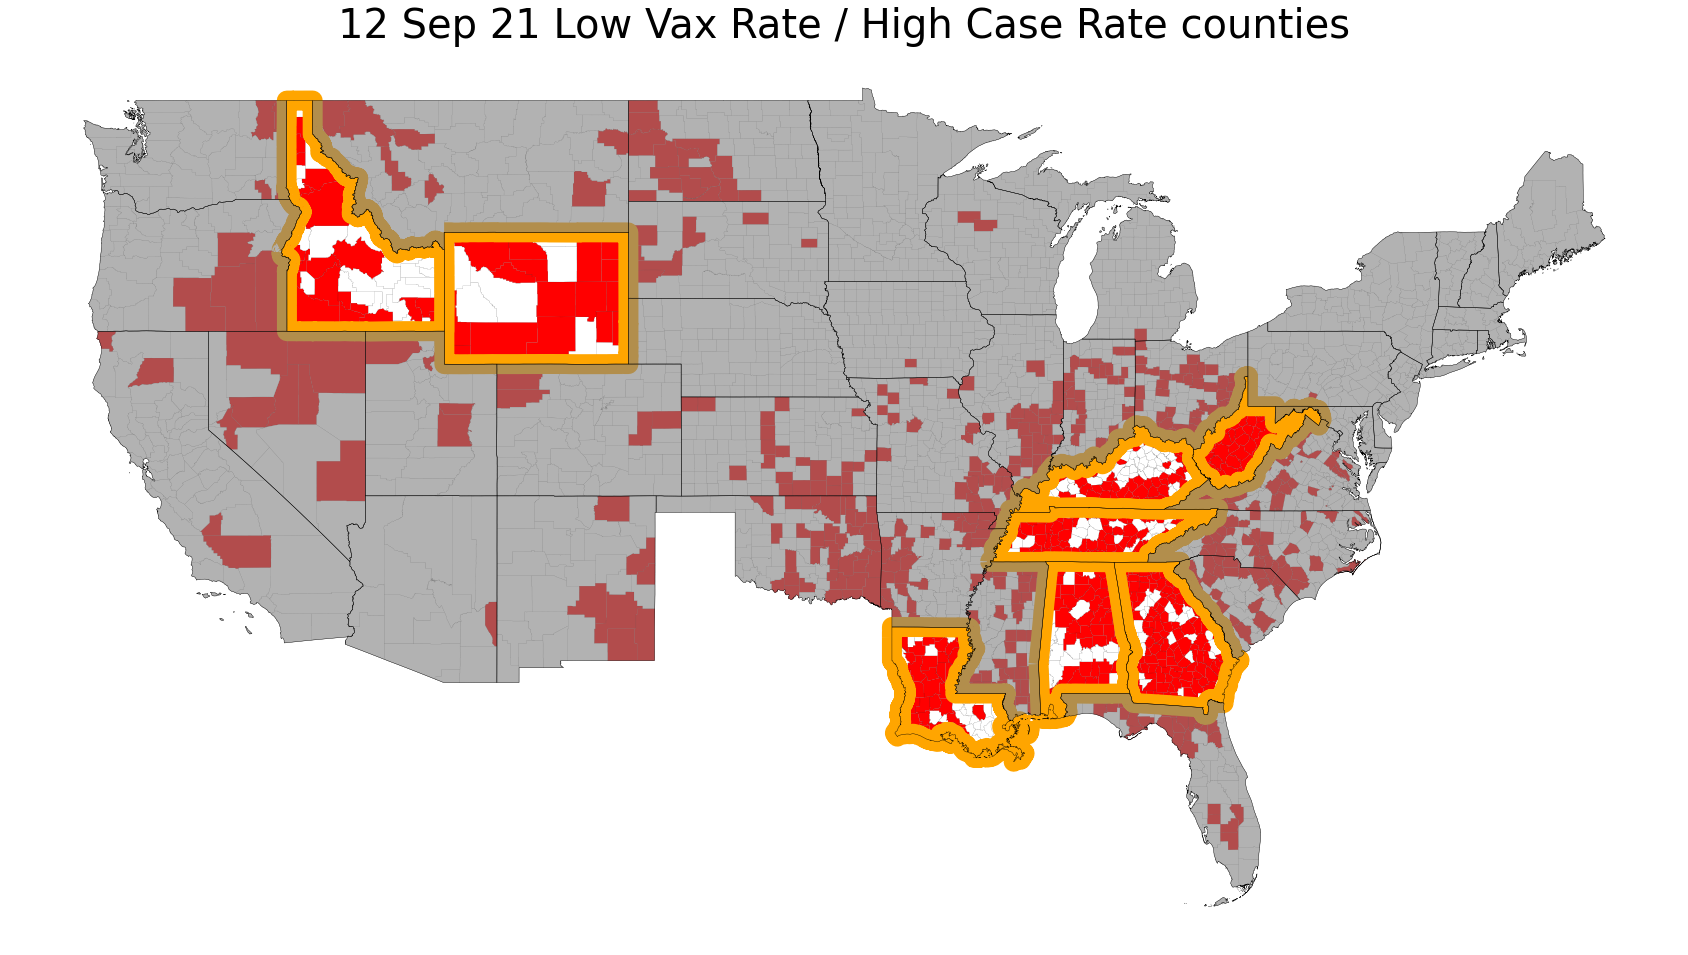

In [68]:


# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 25))

thresh = 100

# remove the axis
ax.axis('off')
gdf2.geometry.boundary.plot(color=None,edgecolor='black',linewidth = .4,ax=ax) #Use your second dataframe

gdf.plot( color=gdf.colorCode, linewidth=0.08, ax=ax, edgecolor='0.05')
plt.title('12 Sep 21 Low Vax Rate / High Case Rate counties',fontsize=40)
gdf2[gdf2.STUSPS.isin(hitArea[hitArea.percentHit>.5].State.tolist())].plot(ax=ax,color='none',edgecolor='orange',linewidth=20)
gdf2[~gdf2.STUSPS.isin(hitArea[hitArea.percentHit>.5].State.tolist())].plot(ax=ax,color='grey',alpha=.6)

## Univariate Low Vaccination High Case

In [69]:
mapvaxcase = 'univariate_lowVax_highCase'
frame_oi = univariate_lowVax_highCase

In [70]:
univariate_lowVax_highCase['univariate_lowVax_highCase_GRADE'] = np.where(univariate_lowVax_highCase.univariate_lowVax_highCase_state.isin(hitList), 1, 0)

In [71]:
univariate_lowVax_highCase['univariate_lowVax_highCase_GRADE'].sum()/len(univariate_lowVax_highCase)

0.34285714285714286

In [72]:
univariate_lowVax_highCase.groupby('univariate_lowVax_highCase_GRADE').univariate_lowVax_highCase_duration.mean()

univariate_lowVax_highCase_GRADE
0    11.19000
1    17.66575
Name: univariate_lowVax_highCase_duration, dtype: float64

<ipython-input-49-b8023828a37a>:19: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Total Participants: '+ str(len(frame_oi)), xy =(1.1, .9),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:22: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct: '+ str(round(pct_correct*100,1))+'%', xy =(1.1, .8),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:24: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct Median time: '+ str(round(median_correct,1))+' sec', xy =(1.1, .7),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:26: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Wrong Me

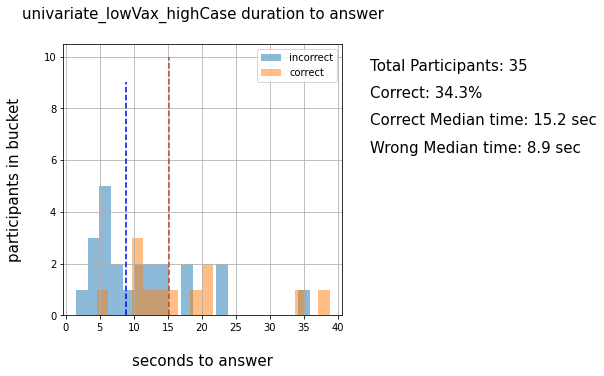

In [73]:
timeAndGradePlot(frame_oi,mapvaxcase)

## Bivariate Low Vaccination High Case

In [74]:
mapvaxcase = 'bivariate_lowVax_highCase'
frame_oi = bivariate_lowVax_highCase

In [75]:
bivariate_lowVax_highCase['bivariate_lowVax_highCase_GRADE'] = np.where(bivariate_lowVax_highCase.bivariate_lowVax_highCase_state.isin(hitList), 1, 0)

In [76]:
bivariate_lowVax_highCase['bivariate_lowVax_highCase_GRADE'].sum()/len(bivariate_lowVax_highCase)

0.34615384615384615

In [77]:
bivariate_lowVax_highCase.groupby('bivariate_lowVax_highCase_GRADE').bivariate_lowVax_highCase_duration.mean()

bivariate_lowVax_highCase_GRADE
0    20.910706
1    17.931583
Name: bivariate_lowVax_highCase_duration, dtype: float64

<ipython-input-49-b8023828a37a>:19: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Total Participants: '+ str(len(frame_oi)), xy =(1.1, .9),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:22: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct: '+ str(round(pct_correct*100,1))+'%', xy =(1.1, .8),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:24: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct Median time: '+ str(round(median_correct,1))+' sec', xy =(1.1, .7),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:26: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Wrong Me

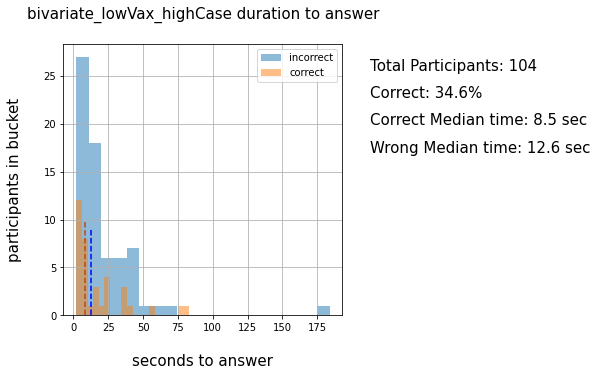

In [78]:
timeAndGradePlot(frame_oi,mapvaxcase)

# High Vaccination High Case

In [79]:
def corrected_colorCoder(vax,cases):
    if vax > vax50 and cases > case50:
        return('red')
    else:
        return('white')
    
gdf['colorCode'] =  gdf.apply(lambda x: corrected_colorCoder(x['% total pop fully vaccinated'],x['Cases - last 7 days per 100k']), axis=1)
gdf['colorCode'] = gdf.colorCode.fillna('white')

In [80]:
hitArea = pd.DataFrame(gdf[gdf.colorCode=='red'].groupby('State').ALAND.sum()).reset_index()
hitArea.rename(columns={'ALAND':'hitArea'},inplace=True)
hitArea = pd.merge(hitArea,pd.DataFrame(gdf.groupby('State').ALAND.sum()).reset_index())
hitArea['percentHit'] = hitArea.hitArea / hitArea.ALAND
hitArea.sort_values('percentHit',ascending=False,inplace=True)
hitArea = pd.merge(hitArea,states,left_on='State',right_on='abbrev')
hitList = hitArea[hitArea.percentHit>.5].state.tolist()
hitArea[hitArea.percentHit>.5]

,State,hitArea,ALAND,percentHit,state,abbrev
0,FL,79652220951,138949136250,0.573247,Florida,FL
1,WA,91515989054,172112588220,0.531722,Washington,WA


<AxesSubplot:title={'center':'12 Sep 21 High Vax Rate / High Case Rate counties'}>

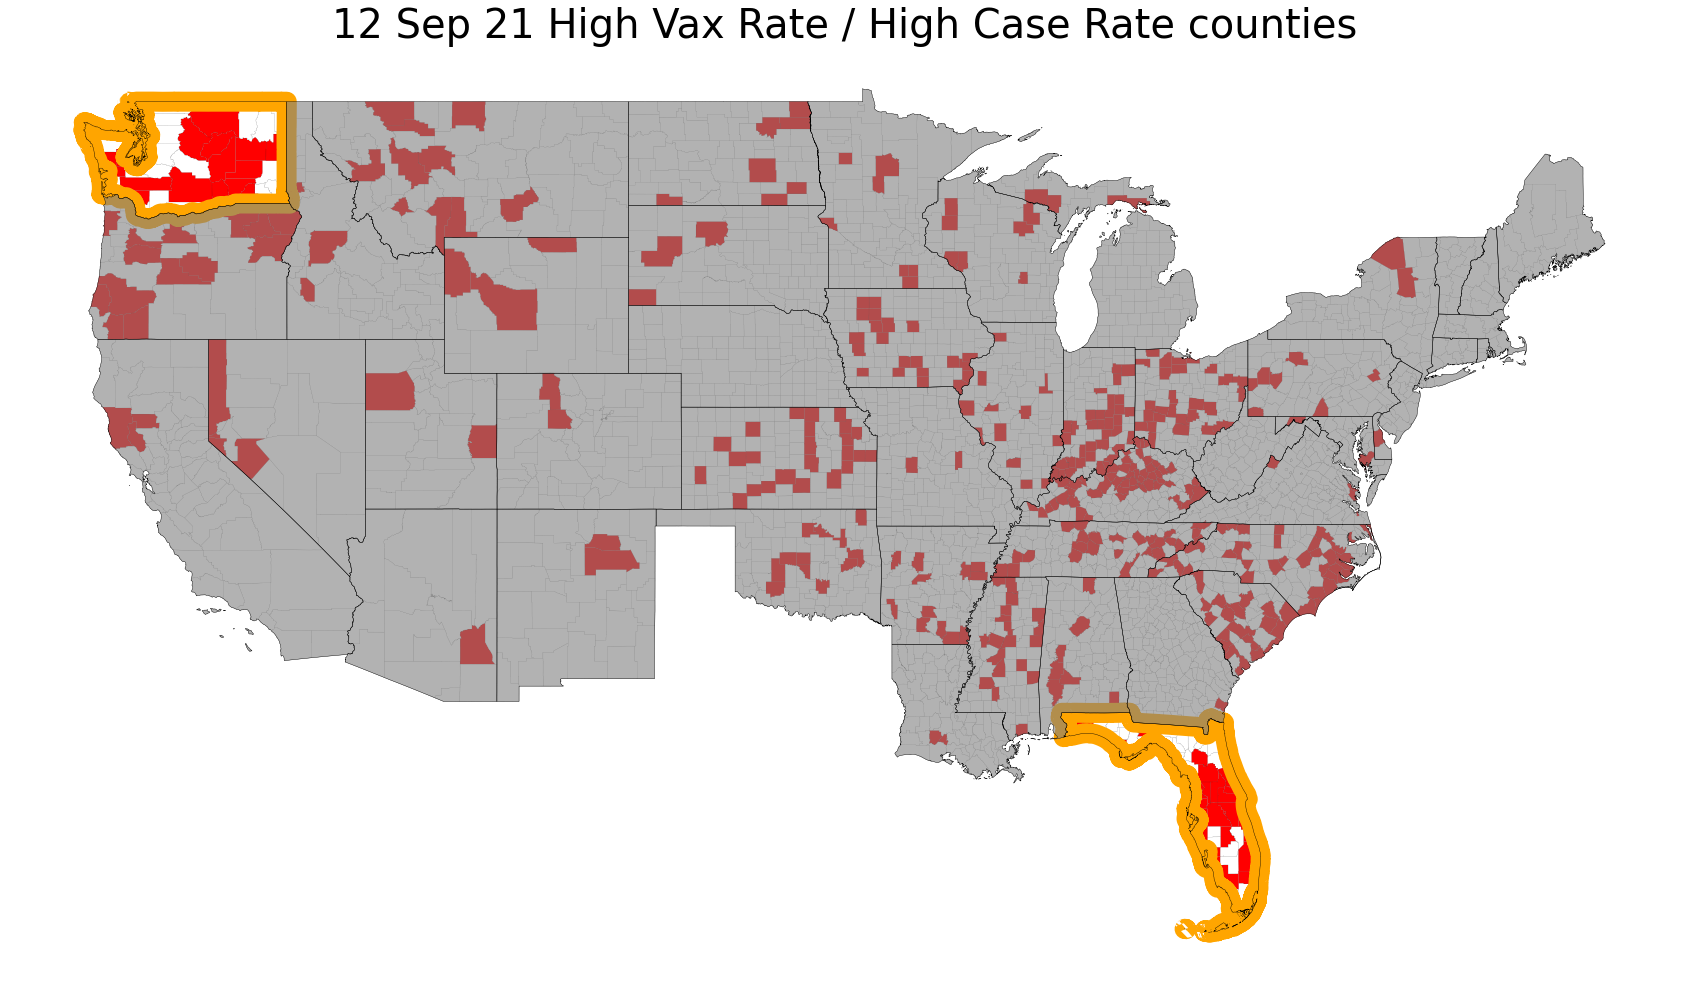

In [81]:


# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 25))

thresh = 100

# remove the axis
ax.axis('off')
gdf2.geometry.boundary.plot(color=None,edgecolor='black',linewidth = .4,ax=ax) #Use your second dataframe

gdf.plot( color=gdf.colorCode, linewidth=0.08, ax=ax, edgecolor='0.05')
plt.title('12 Sep 21 High Vax Rate / High Case Rate counties',fontsize=40)
gdf2[gdf2.STUSPS.isin(hitArea[hitArea.percentHit>.5].State.tolist())].plot(ax=ax,color='none',edgecolor='orange',linewidth=20)
gdf2[~gdf2.STUSPS.isin(hitArea[hitArea.percentHit>.5].State.tolist())].plot(ax=ax,color='grey',alpha=.6)

## Univariate High Vaccination High Case

In [82]:
mapvaxcase = 'univariate_highVax_highCase'
frame_oi = univariate_highVax_highCase

In [83]:
univariate_highVax_highCase['univariate_highVax_highCase_GRADE'] = np.where(univariate_highVax_highCase.univariate_highVax_highCase_state.isin(hitList), 1, 0)

In [84]:
univariate_highVax_highCase

,ip_hash,group,map_pref,map_pref_explain,first_map,bivariate_highVax_highCase_duration,bivariate_highVax_highCase_state,bivariate_highVax_highCase_difficulty,bivariate_highVax_highCase_difficulty_explain,univariate_highVax_highCase_duration,univariate_highVax_highCase_state,univariate_highVax_highCase_difficulty,univariate_highVax_highCase_difficulty_explain,bivariate_highVax_lowCase_duration,bivariate_highVax_lowCase_state,bivariate_highVax_lowCase_difficulty,bivariate_highVax_lowCase_difficulty_explain,univariate_highVax_highCase_GRADE
2,06c989ecceccdb1e602152cbb43f560e10ab1e5e5bcb0b...,d,bivariate,It helps you compare better,univariate,4.689,Washington,2.0,"The colors were differentiated enough, but sti...",10.319,New York,3.0,It took some time to compare the two maps and ...,NaN,NaN,NaN,NaN,0
5,09261e9f04db0b3429af8628e947bbf1d534bbdab6b069...,d,univariate,It's a lot easier to understand the color conc...,univariate,18.686,Massachusetts,3.0,It seems to be a little difficult but if look ...,7.147,New York,4.0,Because the colors are all around,NaN,NaN,NaN,NaN,0
21,148909ad2fb71629e21f7a6470e9e267ddb8b055357162...,d,univariate,"With everything combined, it made the map busi...",univariate,2.057,Florida,5.0,It's hard to tell from the colors and the way ...,33.298,Florida,3.0,"The two separate graphics, matching and sizing...",NaN,NaN,NaN,NaN,1
32,202fd7da0267d2d0d6f931757d7caa442f8e52703456b9...,d,bivariate,it seems more correct,univariate,31.877,Washington,2.0,it seems right,15.752,Arizona,2.0,it seems right,NaN,NaN,NaN,NaN,0
37,24291fb7ccfb375ed883fa84c7ab359ae3b506c5689b59...,d,bivariate,It was easier to use the grid than to look at ...,univariate,6.312,Utah,3.0,"There was a lot of color, but I was able to di...",17.110,Florida,5.0,It was difficult to find the dark green areas,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,d7b3492eab84baa3e9774502835dedaf1865620a9e4a74...,h,univariate,The other option can be confusing for some.,bivariate,11.487,Kentucky,3.0,That seems like the spot,6.461,Wyoming,3.0,That is the spot,NaN,NaN,NaN,NaN,0
231,e19a292547b78a05199a10c671479b7274199f187c1f47...,h,bivariate,easier to pinpoint,bivariate,10.128,Wyoming,3.0,lots of colors,13.033,Florida,3.0,somewhat difficult,NaN,NaN,NaN,NaN,1
257,f32c6d14c792361626dfa23451b7f3d63aa771cb6f9797...,h,univariate,It was easier to separate the information and ...,bivariate,31.720,Washington,2.0,The legend was easy to read.,19.722,Washington,2.0,The state met both criteria and was easy to find,NaN,NaN,NaN,NaN,1
260,f4f5a322286baf685ebbab5719c305fa85be4a60bdf3f1...,h,univariate,Very unique and innovative,bivariate,2.642,Wyoming,1.0,Very easy to find,1.385,Wyoming,1.0,Very easy to find,NaN,NaN,NaN,NaN,0


In [85]:
univariate_highVax_highCase['univariate_highVax_highCase_GRADE'].sum()/len(univariate_highVax_highCase)

0.1836734693877551

In [86]:
univariate_highVax_highCase.groupby('univariate_highVax_highCase_GRADE').univariate_highVax_highCase_duration.mean()

univariate_highVax_highCase_GRADE
0    15.465650
1    20.212778
Name: univariate_highVax_highCase_duration, dtype: float64

<ipython-input-49-b8023828a37a>:19: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Total Participants: '+ str(len(frame_oi)), xy =(1.1, .9),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:22: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct: '+ str(round(pct_correct*100,1))+'%', xy =(1.1, .8),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:24: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct Median time: '+ str(round(median_correct,1))+' sec', xy =(1.1, .7),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:26: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Wrong Me

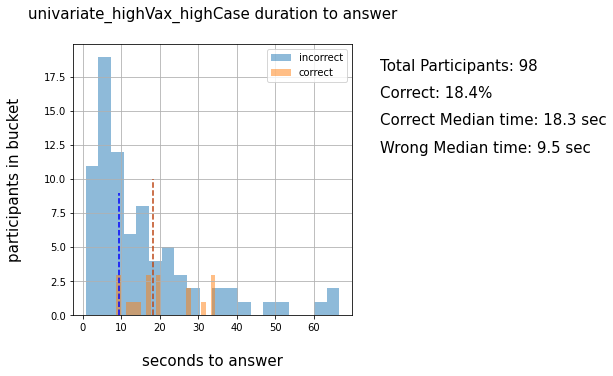

In [87]:
timeAndGradePlot(frame_oi,mapvaxcase)

## Bivariate High Vaccination High Case

In [88]:
mapvaxcase = 'bivariate_highVax_highCase'
frame_oi = bivariate_highVax_highCase

In [89]:
bivariate_highVax_highCase['bivariate_highVax_highCase_GRADE'] = np.where(bivariate_highVax_highCase.bivariate_highVax_highCase_state.isin(hitList), 1, 0)

In [90]:
bivariate_highVax_highCase['bivariate_highVax_highCase_GRADE'].sum()/len(bivariate_highVax_highCase)

0.25

In [91]:
bivariate_highVax_highCase.groupby('bivariate_highVax_highCase_GRADE').bivariate_highVax_highCase_duration.mean()

bivariate_highVax_highCase_GRADE
0    11.147533
1    15.693720
Name: bivariate_highVax_highCase_duration, dtype: float64

<ipython-input-49-b8023828a37a>:19: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Total Participants: '+ str(len(frame_oi)), xy =(1.1, .9),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:22: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct: '+ str(round(pct_correct*100,1))+'%', xy =(1.1, .8),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:24: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct Median time: '+ str(round(median_correct,1))+' sec', xy =(1.1, .7),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:26: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Wrong Me

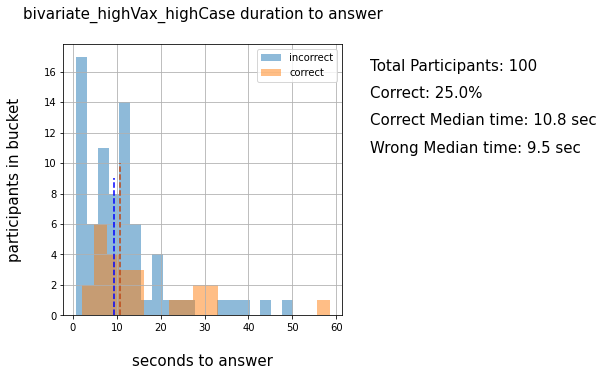

In [92]:
timeAndGradePlot(frame_oi,mapvaxcase)

# Low Vaccination Low Case

In [93]:
def corrected_colorCoder(vax,cases):
    if vax < vax50 and cases < case50:
        return('red')
    else:
        return('white')
    
gdf['colorCode'] =  gdf.apply(lambda x: corrected_colorCoder(x['% total pop fully vaccinated'],x['Cases - last 7 days per 100k']), axis=1)
gdf['colorCode'] = gdf.colorCode.fillna('white')

In [94]:
hitArea = pd.DataFrame(gdf[gdf.colorCode=='red'].groupby('State').ALAND.sum()).reset_index()
hitArea.rename(columns={'ALAND':'hitArea'},inplace=True)
hitArea = pd.merge(hitArea,pd.DataFrame(gdf.groupby('State').ALAND.sum()).reset_index())
hitArea['percentHit'] = hitArea.hitArea / hitArea.ALAND
hitArea.sort_values('percentHit',ascending=False,inplace=True)
hitArea = pd.merge(hitArea,states,left_on='State',right_on='abbrev')
hitList = hitArea[hitArea.percentHit>.5].state.tolist()
hitArea[hitArea.percentHit>.5]

,State,hitArea,ALAND,percentHit,state,abbrev
0,NE,163494282786,198956658395,0.821758,Nebraska,NE
1,MO,96686378421,175001698394,0.552488,Missouri,MO
2,VA,55233970816,102257717110,0.540145,Virginia,VA


<AxesSubplot:title={'center':'12 Sep 21 Low Vax Rate / Low Case Rate counties'}>

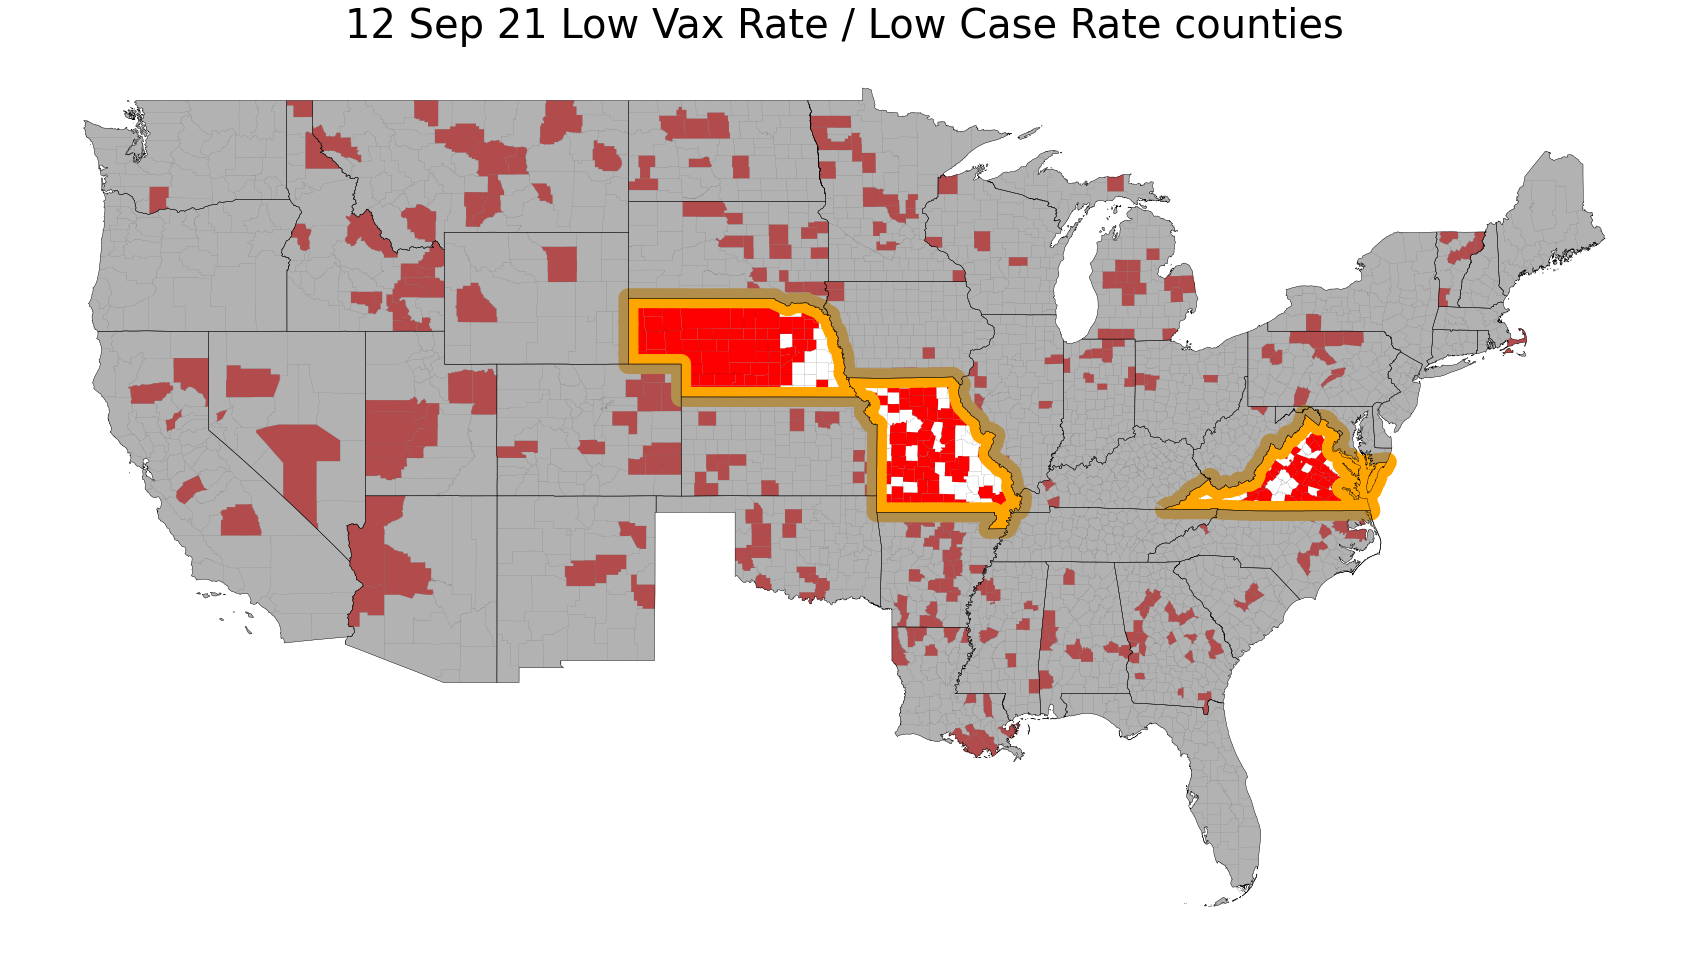

In [95]:

# create figure and axes for Matplotlib
fig, ax = plt.subplots(1, figsize=(30, 25))

thresh = 100

# remove the axis
ax.axis('off')
gdf2.geometry.boundary.plot(color=None,edgecolor='black',linewidth = .4,ax=ax) #Use your second dataframe

gdf.plot( color=gdf.colorCode, linewidth=0.08, ax=ax, edgecolor='0.05')
plt.title('12 Sep 21 Low Vax Rate / Low Case Rate counties',fontsize=40)
gdf2[gdf2.STUSPS.isin(hitArea[hitArea.percentHit>.5].State.tolist())].plot(ax=ax,color='none',edgecolor='orange',linewidth=20)
gdf2[~gdf2.STUSPS.isin(hitArea[hitArea.percentHit>.5].State.tolist())].plot(ax=ax,color='grey',alpha=.6)

## Univariate Low Vax Low Case

In [96]:
mapvaxcase = 'univariate_lowVax_lowCase'
frame_oi = univariate_lowVax_lowCase

In [97]:
univariate_lowVax_lowCase['univariate_lowVax_lowCase_GRADE'] = np.where(univariate_lowVax_lowCase.univariate_lowVax_lowCase_state.isin(hitList), 1, 0)

In [98]:
univariate_lowVax_lowCase['univariate_lowVax_lowCase_GRADE'].sum()/len(univariate_lowVax_lowCase)

0.65625

In [99]:
univariate_lowVax_lowCase.groupby('univariate_lowVax_lowCase_GRADE').univariate_lowVax_lowCase_duration.mean()

univariate_lowVax_lowCase_GRADE
0    10.206727
1    23.227905
Name: univariate_lowVax_lowCase_duration, dtype: float64

<ipython-input-49-b8023828a37a>:19: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Total Participants: '+ str(len(frame_oi)), xy =(1.1, .9),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:22: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct: '+ str(round(pct_correct*100,1))+'%', xy =(1.1, .8),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:24: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct Median time: '+ str(round(median_correct,1))+' sec', xy =(1.1, .7),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:26: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Wrong Me

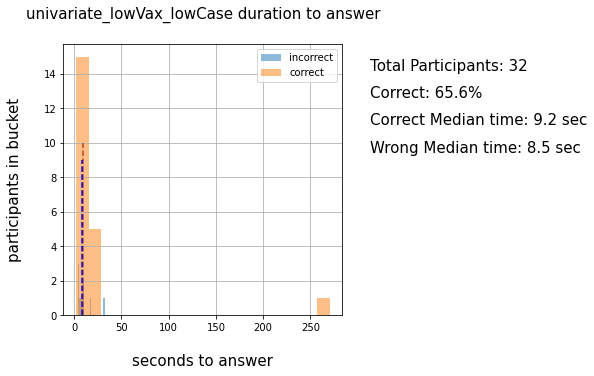

In [100]:
timeAndGradePlot(frame_oi,mapvaxcase)

## Bivariate Low Vax Low Case

In [101]:
mapvaxcase = 'bivariate_lowVax_lowCase'
frame_oi = bivariate_lowVax_lowCase

In [102]:
bivariate_lowVax_lowCase['bivariate_lowVax_lowCase_GRADE'] = np.where(bivariate_lowVax_lowCase.bivariate_lowVax_lowCase_state.isin(hitList), 1, 0)

In [103]:
bivariate_lowVax_lowCase['bivariate_lowVax_lowCase_GRADE'].sum()/len(bivariate_lowVax_lowCase)

0.6571428571428571

In [104]:
bivariate_lowVax_lowCase.groupby('bivariate_lowVax_lowCase_GRADE').bivariate_lowVax_lowCase_duration.mean()

bivariate_lowVax_lowCase_GRADE
0    9.742417
1    8.785043
Name: bivariate_lowVax_lowCase_duration, dtype: float64

<ipython-input-49-b8023828a37a>:19: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Total Participants: '+ str(len(frame_oi)), xy =(1.1, .9),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:22: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct: '+ str(round(pct_correct*100,1))+'%', xy =(1.1, .8),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:24: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Correct Median time: '+ str(round(median_correct,1))+' sec', xy =(1.1, .7),fontsize=15,textcoords='axes fraction' )
<ipython-input-49-b8023828a37a>:26: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate('Wrong Me

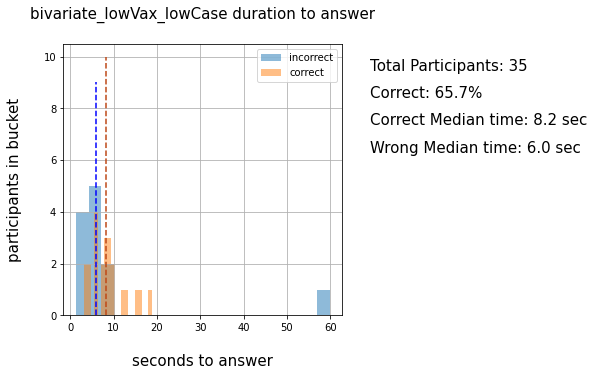

In [105]:
timeAndGradePlot(frame_oi,mapvaxcase)

# Make a .csv of graded results

In [106]:
pd.concat([univariate_highVax_highCase,univariate_highVax_lowCase,univariate_lowVax_highCase,univariate_lowVax_lowCase,\
           bivariate_highVax_highCase,bivariate_highVax_lowCase,bivariate_lowVax_highCase,bivariate_lowVax_lowCase]).to_csv(\
            os.getcwd()+'/graded_results.csv',index=False)